#Fire up graphlab create

In [1]:
import graphlab

#Load some house value vs. crime rate data

Dataset is from Philadelphia, PA and includes average house sales price in a number of neighborhoods.  The attributes of each neighborhood we have include the crime rate ('CrimeRate'), miles from Center City ('MilesPhila'), town name ('Name'), and county name ('County').

In [2]:
sales = graphlab.SFrame.read_csv('Philadelphia_Crime_Rate_noNA.csv/')

[INFO] 1450286480 : INFO:     (initialize_globals_from_environment:282): Setting configuration variable GRAPHLAB_FILEIO_ALTERNATIVE_SSL_CERT_FILE to /Users/jiejing/.graphlab/anaconda/lib/python2.7/site-packages/certifi/cacert.pem
1450286480 : INFO:     (initialize_globals_from_environment:282): Setting configuration variable GRAPHLAB_FILEIO_ALTERNATIVE_SSL_CERT_DIR to 
This non-commercial license of GraphLab Create is assigned to kzjeef@gmail.com and will expire on December 14, 2016. For commercial licensing options, visit https://dato.com/buy/.

[INFO] Start server at: ipc:///tmp/graphlab_server-5682 - Server binary: /Users/jiejing/.graphlab/anaconda/lib/python2.7/site-packages/graphlab/unity_server - Server log: /tmp/graphlab_server_1450286480.log
[INFO] GraphLab Server Version: 1.7.1


PROGRESS: Finished parsing file /Users/jiejing/Developer/wa-ml/ml-code-regression/week1/demo1/Philadelphia_Crime_Rate_noNA.csv
PROGRESS: Parsing completed. Parsed 99 lines in 0.028521 secs.
------------------------------------------------------
Inferred types from first line of file as 
column_type_hints=[int,float,float,float,float,str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------
PROGRESS: Finished parsing file /Users/jiejing/Developer/wa-ml/ml-code-regression/week1/demo1/Philadelphia_Crime_Rate_noNA.csv
PROGRESS: Parsing completed. Parsed 99 lines in 0.011783 secs.


In [29]:
sales
sales.tail()


HousePrice,"HsPrc ($10,000)",CrimeRate,MilesPhila,PopChg,Name,County
124478,12.4478,71.9,22.0,4.6,W. Chester,Chester
168276,16.8276,31.9,26.0,5.9,W. Goshen,Chester
114157,11.4157,44.6,38.0,14.6,W. Whiteland,Chester
130088,13.0088,28.6,19.0,-0.2,Warminster,Bucks
152624,15.2624,24.0,19.0,23.1,Warrington,Bucks
174232,17.4232,13.8,25.0,4.7,Westtown,Chester
196515,19.6515,29.9,16.0,1.8,Whitemarsh,Montgome
232714,23.2714,9.9,21.0,0.2,Willistown,Chester
245920,24.592,22.6,10.0,0.3,Wynnewood,Montgome
130953,13.0953,13.0,24.0,5.2,Yardley,Bucks


#Exploring the data 

The house price in a town is correlated with the crime rate of that town. Low crime towns tend to be associated with higher house prices and vice versa.

In [30]:
graphlab.canvas.set_target('ipynb')
sales.show(view="Scatter Plot", x="CrimeRate", y="HousePrice")
sales.show(view="Scatter Plot", x="MilesPhila", y="HousePrice")

#Fit the regression model using crime as the feature

In [37]:
crime_model = graphlab.linear_regression.create(sales, target='HousePrice', features=['CrimeRate'],validation_set=None,verbose=False)

mile_model = graphlab.linear_regression.create(sales, target='HousePrice', features=['MilesPhila'],validation_set=None,verbose=False)

In [38]:
mile_model.predict(sales)


dtype: float
Rows: 99
[144605.45041163088, 156007.28204817968, 165983.8847301599, 165983.8847301599, 157432.5110027483, 158857.7399573169, 151731.5951844739, 158857.7399573169, 150306.36622990528, 167409.1136847285, 174535.2584575715, 143180.2214570623, 144605.45041163088, 175960.4874121401, 151731.5951844739, 141754.9925024937, 160282.9689118855, 167409.1136847285, 167409.1136847285, 165983.8847301599, 157432.5110027483, 161708.19786645408, 173110.0295030029, 150306.36622990528, 173110.0295030029, 151731.5951844739, 147455.9083207681, 144605.45041163088, 158857.7399573169, 144605.45041163088, 158857.7399573169, 144605.45041163088, 154582.0530936111, 158857.7399573169, 175960.4874121401, 144605.45041163088, 158857.7399573169, 180236.1742758459, 140329.76354792507, 180236.1742758459, 163133.4268210227, 144605.45041163088, 158857.7399573169, 163133.4268210227, 151731.5951844739, 150306.36622990528, 165983.8847301599, 151731.5951844739, 151731.5951844739, 163133.4268210227, 165983.8847301

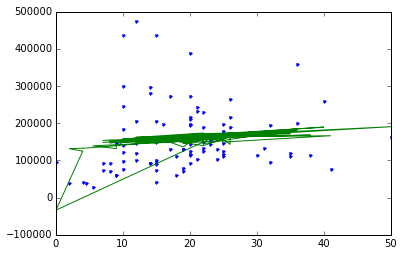

In [36]:
plt.plot(sales['MilesPhila'], sales['HousePrice'], ".", sales['MilesPhila'], mile_model.predict(sales), '-' )

#Let's see what our fit looks like

Matplotlib is a Python plotting library that is also useful for plotting.  You can install it with:

'pip install matplotlib'

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

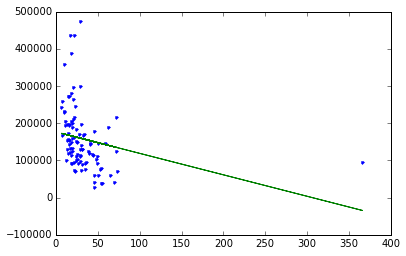

In [15]:
plt.plot(sales['CrimeRate'],sales['HousePrice'],'.',
        sales['CrimeRate'],crime_model.predict(sales),'-')

Above: blue dots are original data, green line is the fit from the simple regression.

# Remove Center City and redo the analysis

Center City is the one observation with an extremely high crime rate, yet house prices are not very low.  This point does not follow the trend of the rest of the data very well.  A question is how much including Center City is influencing our fit on the other datapoints.  Let's remove this datapoint and see what happens.

In [16]:
sales_noCC = sales[sales['MilesPhila'] != 0.0] 

In [17]:
sales_noCC.show(view="Scatter Plot", x="CrimeRate", y="HousePrice")

### Refit our simple regression model on this modified dataset:

In [26]:
crime_model_noCC = graphlab.linear_regression.create(sales_noCC, target='HousePrice', features=['CrimeRate'],validation_set=None, verbose=False)

popchg_model_noCC = graphlab.linear_regression.create(sales, target='HousePrice', features=['PopChg'],validation_set=None, verbose=False)

[ERROR] Toolkit error: Missing value (None) encountered in column 'PopChg'. Use the SFrame's dropna function to drop rows with 'None' values in them.


ToolkitError: Missing value (None) encountered in column 'PopChg'. Use the SFrame's dropna function to drop rows with 'None' values in them.

### Look at the fit:

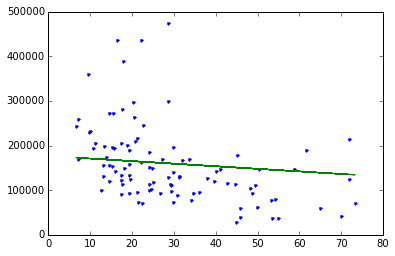

In [19]:
plt.plot(sales_noCC['CrimeRate'],sales_noCC['HousePrice'],'.',
        sales_noCC['CrimeRate'],crime_model.predict(sales_noCC),'-')

# Compare coefficients for full-data fit versus no-Center-City fit

Visually, the fit seems different, but let's quantify this by examining the estimated coefficients of our original fit and that of the modified dataset with Center City removed.

In [41]:
crime_model.get('coefficients')


name,index,value
(intercept),None,176626.046881
CrimeRate,None,-576.804949058


In [40]:
# get mile model 's 

mile_model.get('coefficients')

name,index,value
(intercept),None,130353.160866
MilesPhila,None,1425.22895457


In [21]:
crime_model_noCC.get('coefficients')

name,index,value
(intercept),None,225204.604303
CrimeRate,None,-2287.69717443


Above: We see that for the "no Center City" version, per unit increase in crime, the predicted decrease in house prices is 2,287.  In contrast, for the original dataset, the drop is only 576 per unit increase in crime.  This is significantly different!

###High leverage points: 
Center City is said to be a "high leverage" point because it is at an extreme x value where there are not other observations.  As a result, recalling the closed-form solution for simple regression, this point has the *potential* to dramatically change the least squares line since the center of x mass is heavily influenced by this one point and the least squares line will try to fit close to that outlying (in x) point.  If a high leverage point follows the trend of the other data, this might not have much effect.  On the other hand, if this point somehow differs, it can be strongly influential in the resulting fit.

###Influential observations:  
An influential observation is one where the removal of the point significantly changes the fit.  As discussed above, high leverage points are good candidates for being influential observations, but need not be.  Other observations that are *not* leverage points can also be influential observations (e.g., strongly outlying in y even if x is a typical value).

# Remove high-value outlier neighborhoods and redo analysis

Based on the discussion above, a question is whether the outlying high-value towns are strongly influencing the fit.  Let's remove them and see what happens.

In [24]:
sales_nohighend = sales_noCC[sales_noCC['HousePrice'] < 350000] 
crime_model_nohighend = graphlab.linear_regression.create(sales_nohighend, target='HousePrice', features=['CrimeRate'],validation_set=None, verbose=False)

### Do the coefficients change much?

In [34]:
crime_model_noCC.get('coefficients')

name,index,value
(intercept),None,225204.604303
CrimeRate,None,-2287.69717443


In [35]:
crime_model_nohighend.get('coefficients')

name,index,value
(intercept),None,199073.589615
CrimeRate,None,-1837.71280989


Above: We see that removing the outlying high-value neighborhoods has *some* effect on the fit, but not nearly as much as our high-leverage Center City datapoint.